b# 1/ Loading data into dataframes

In [1]:
import pandas as pd

red_wine_df = pd.read_csv("DATA/winequality-red.csv",sep=";")
white_wine_df = pd.read_csv("DATA/winequality-white.csv",sep=";")

In [2]:
print(red_wine_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [3]:
red_wine_df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'ph', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

# 2/ Pre-processing data

In [4]:
# Function that renames column names to the standard form
def fix_column_names(df):
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
    return

# rename column names
fix_column_names(red_wine_df)
fix_column_names(white_wine_df)

In [5]:
# add wine_tpye for 2 df
red_wine_df["wine_type"] = "red"
white_wine_df["wine_type"] = "white"

In [6]:
# concat 2 df
all_wines = pd.concat([red_wine_df,white_wine_df])

In [7]:
# re-shuffer records to randomize data points
all_wines = all_wines.sample(frac=1,random_state=42).reset_index(drop=True)

In [8]:
# add feature "quality_label"
def make_quality_label(x):
    if x<6:
        return "low"
    elif x<8:
        return "medium"
    else:
        return "high"
all_wines["quality_label"] = all_wines.quality.apply(make_quality_label)


In [9]:
all_wines.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [10]:
all_wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   ph                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_type             6497 non-null   object 
 13  quality_label         6497 non-null   object 
dtypes: float64(11), int64(1), object(2)
memory usage: 710.7+ KB


In [1]:
####################################
all_wines.columns


NameError: name 'all_wines' is not defined

# 3/ Uni-variable Analysis

## 3.1/ Plotting histogram graphs for each Type of Wines (separately)

C:\Users\zacha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


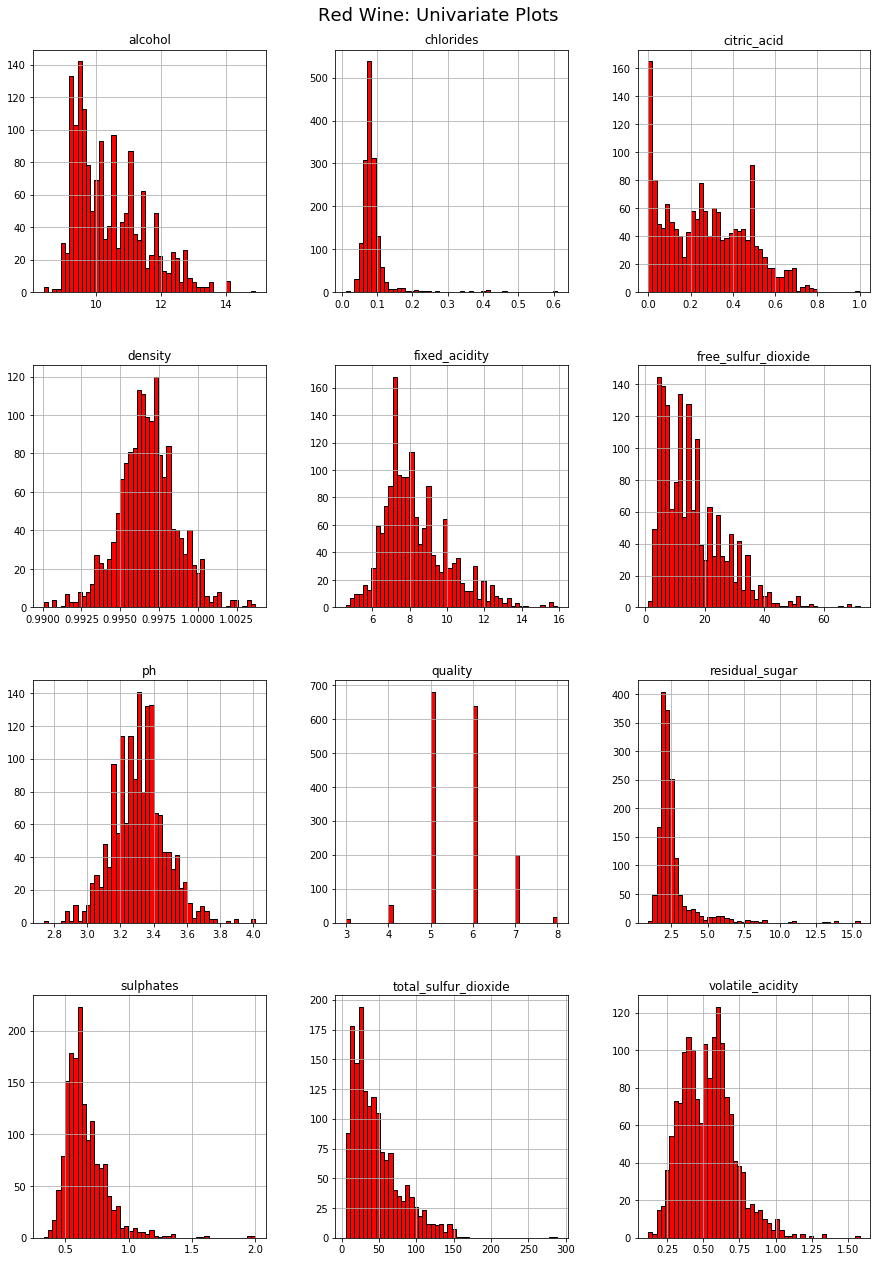

In [11]:
import matplotlib.pyplot as plt
# Red wines
fig = plt.figure(figsize=(15,20))
red_wine_df.hist(bins = 50, color ='red',edgecolor='black',ax = fig.gca())
plt.suptitle('Red Wine: Univariate Plots',fontsize=18)
plt.subplots_adjust(top=0.95)
plt.show()

C:\Users\zacha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


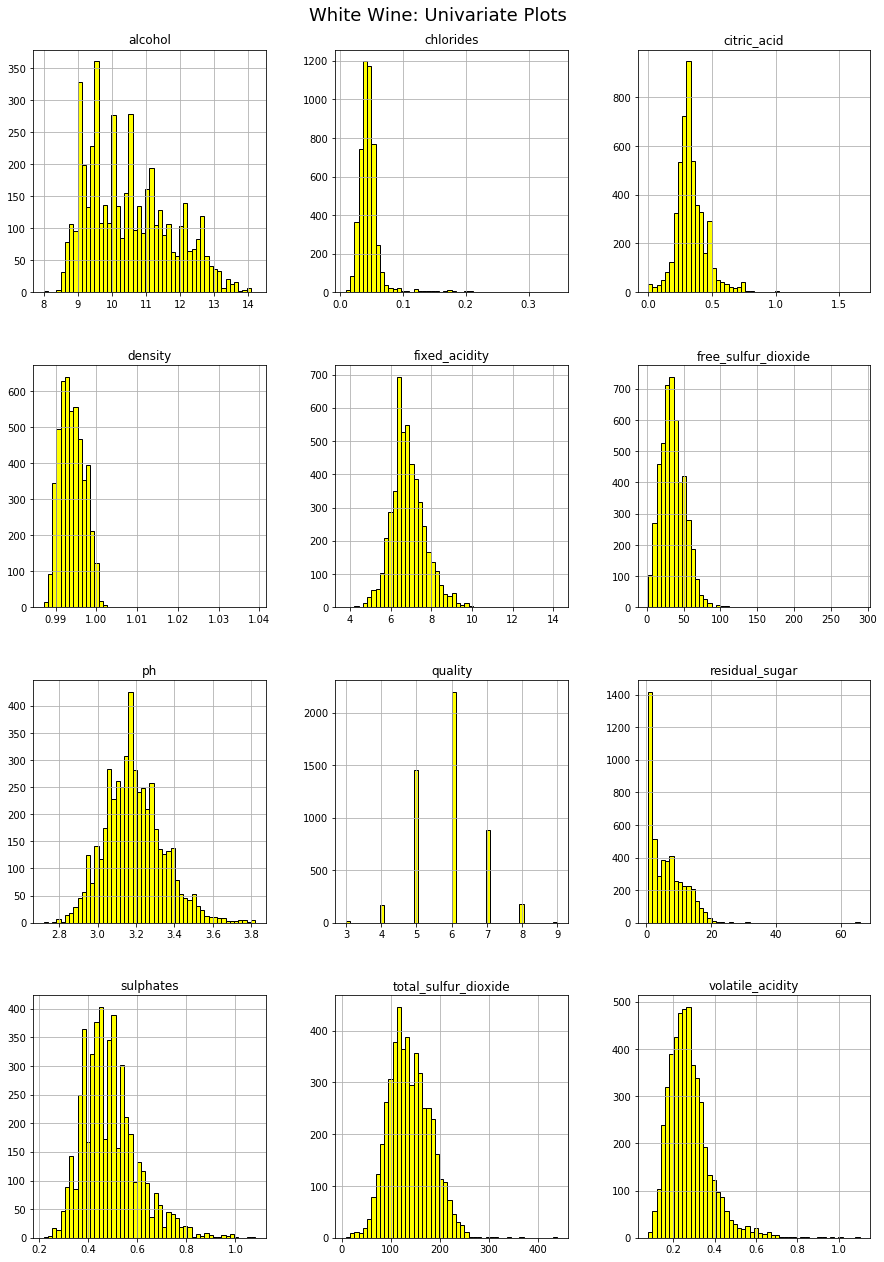

In [12]:
# White wines
fig = plt.figure(figsize=(15,20))
white_wine_df.hist(bins = 50, color ='yellow',edgecolor='black',ax = fig.gca())
plt.suptitle('White Wine: Univariate Plots',fontsize=18)
plt.subplots_adjust(top=0.95)
plt.show()

## 3.2/ Plotting histogram graphs for each Type of Wines (together)

In [13]:
import numpy as np

# get names off all numerical attributes
numerical_attribute_names = red_wine_df.select_dtypes(np.number).columns.sort_values()

# number of numerical attributes
num_numerical_attributes = len(numerical_attribute_names)

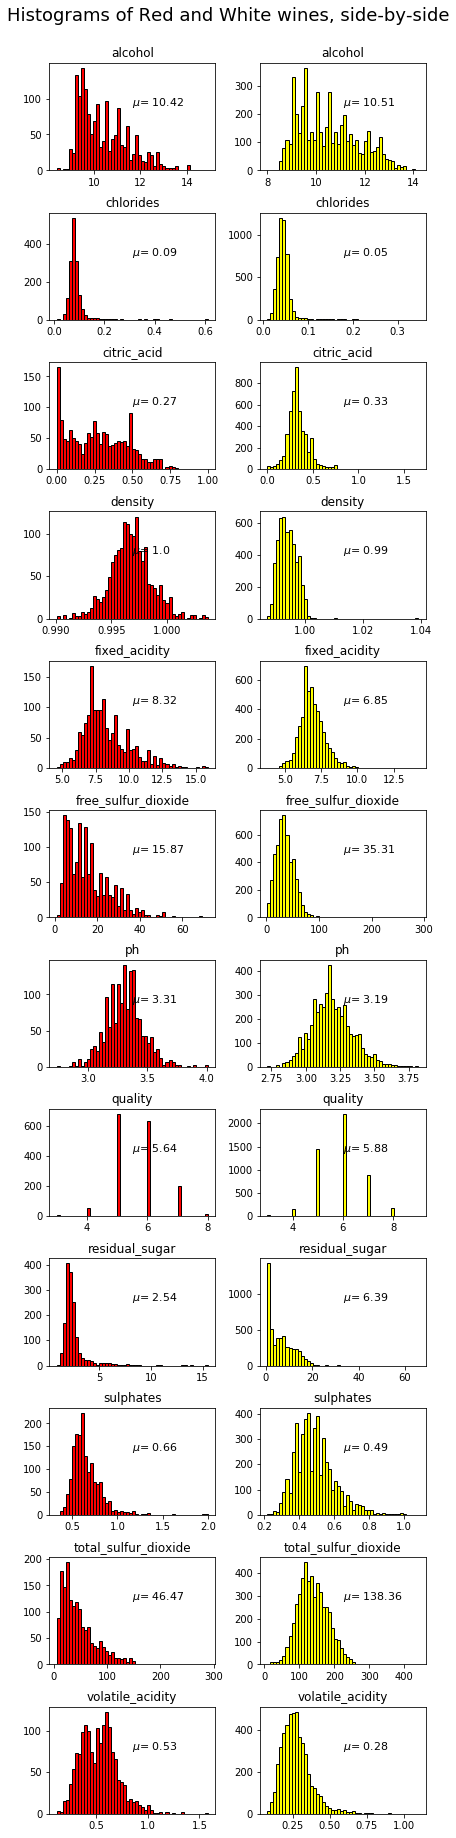

In [14]:
import matplotlib.pyplot as plt
# make hist plots for two types of wines
fig,axs = plt.subplots(num_numerical_attributes,2,figsize=(6,26))
fig.suptitle("Histograms of Red and White wines, side-by-side",fontsize= 18)

for ix,el in enumerate(numerical_attribute_names):
    ax1, ax2 = axs[ix,0], axs[ix,1]
    ax1.hist(red_wine_df[el],bins=50, color="red",edgecolor="black")
    ax1.title.set_text(el)
    ax1.text(0.5,0.6, f'$\mu$= {round(red_wine_df[el].mean(),2)}',fontsize=11,transform=ax1.transAxes)

    ax2.hist(white_wine_df[el],bins=50, color="yellow",edgecolor="black")
    ax2.title.set_text(el)
    ax2.text(0.5,0.6, f'$\mu$= {round(white_wine_df[el].mean(),2)}',fontsize=11,transform=ax2.transAxes)

plt.tight_layout()
plt.subplots_adjust(top=0.95)   # to avoid the overlap
plt.show()

# 4/ Multi-variate Analysis

## 4.1/ Correlation relationships

In [15]:
# get the correlation matrix
corr = all_wines.corr()

### plot correlation matrix

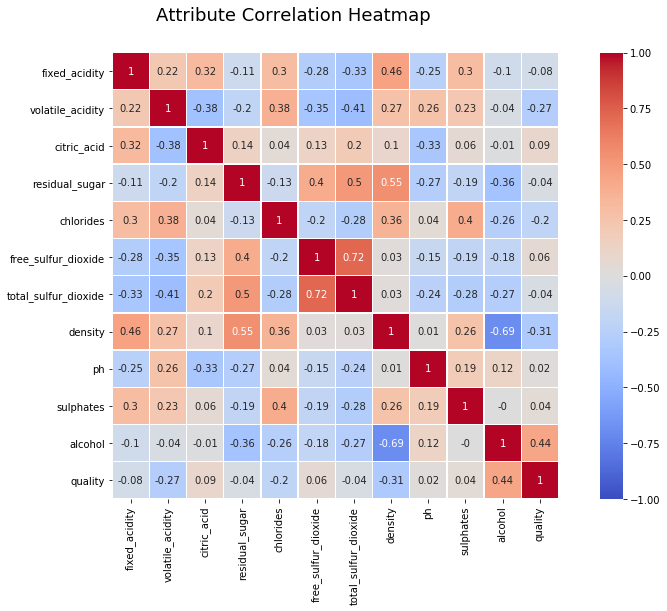

In [16]:
import seaborn as sns
fig,ax = plt.subplots(figsize=(15,8))
hm = sns.heatmap(round(corr,2),annot=True,ax=ax, vmin= -1.0,vmax= 1.0,
                 cmap="coolwarm",linewidths=0.5,square=True)
fig.subplots_adjust(top=0.9)
fig.suptitle('Attribute Correlation Heatmap',fontsize=18)
plt.show()

- a strong positive correlation between total_sulfur_dioxide and free_sulfur_dioxide
- a strong negative correlation between alcohol and density.

### plot pair-plot

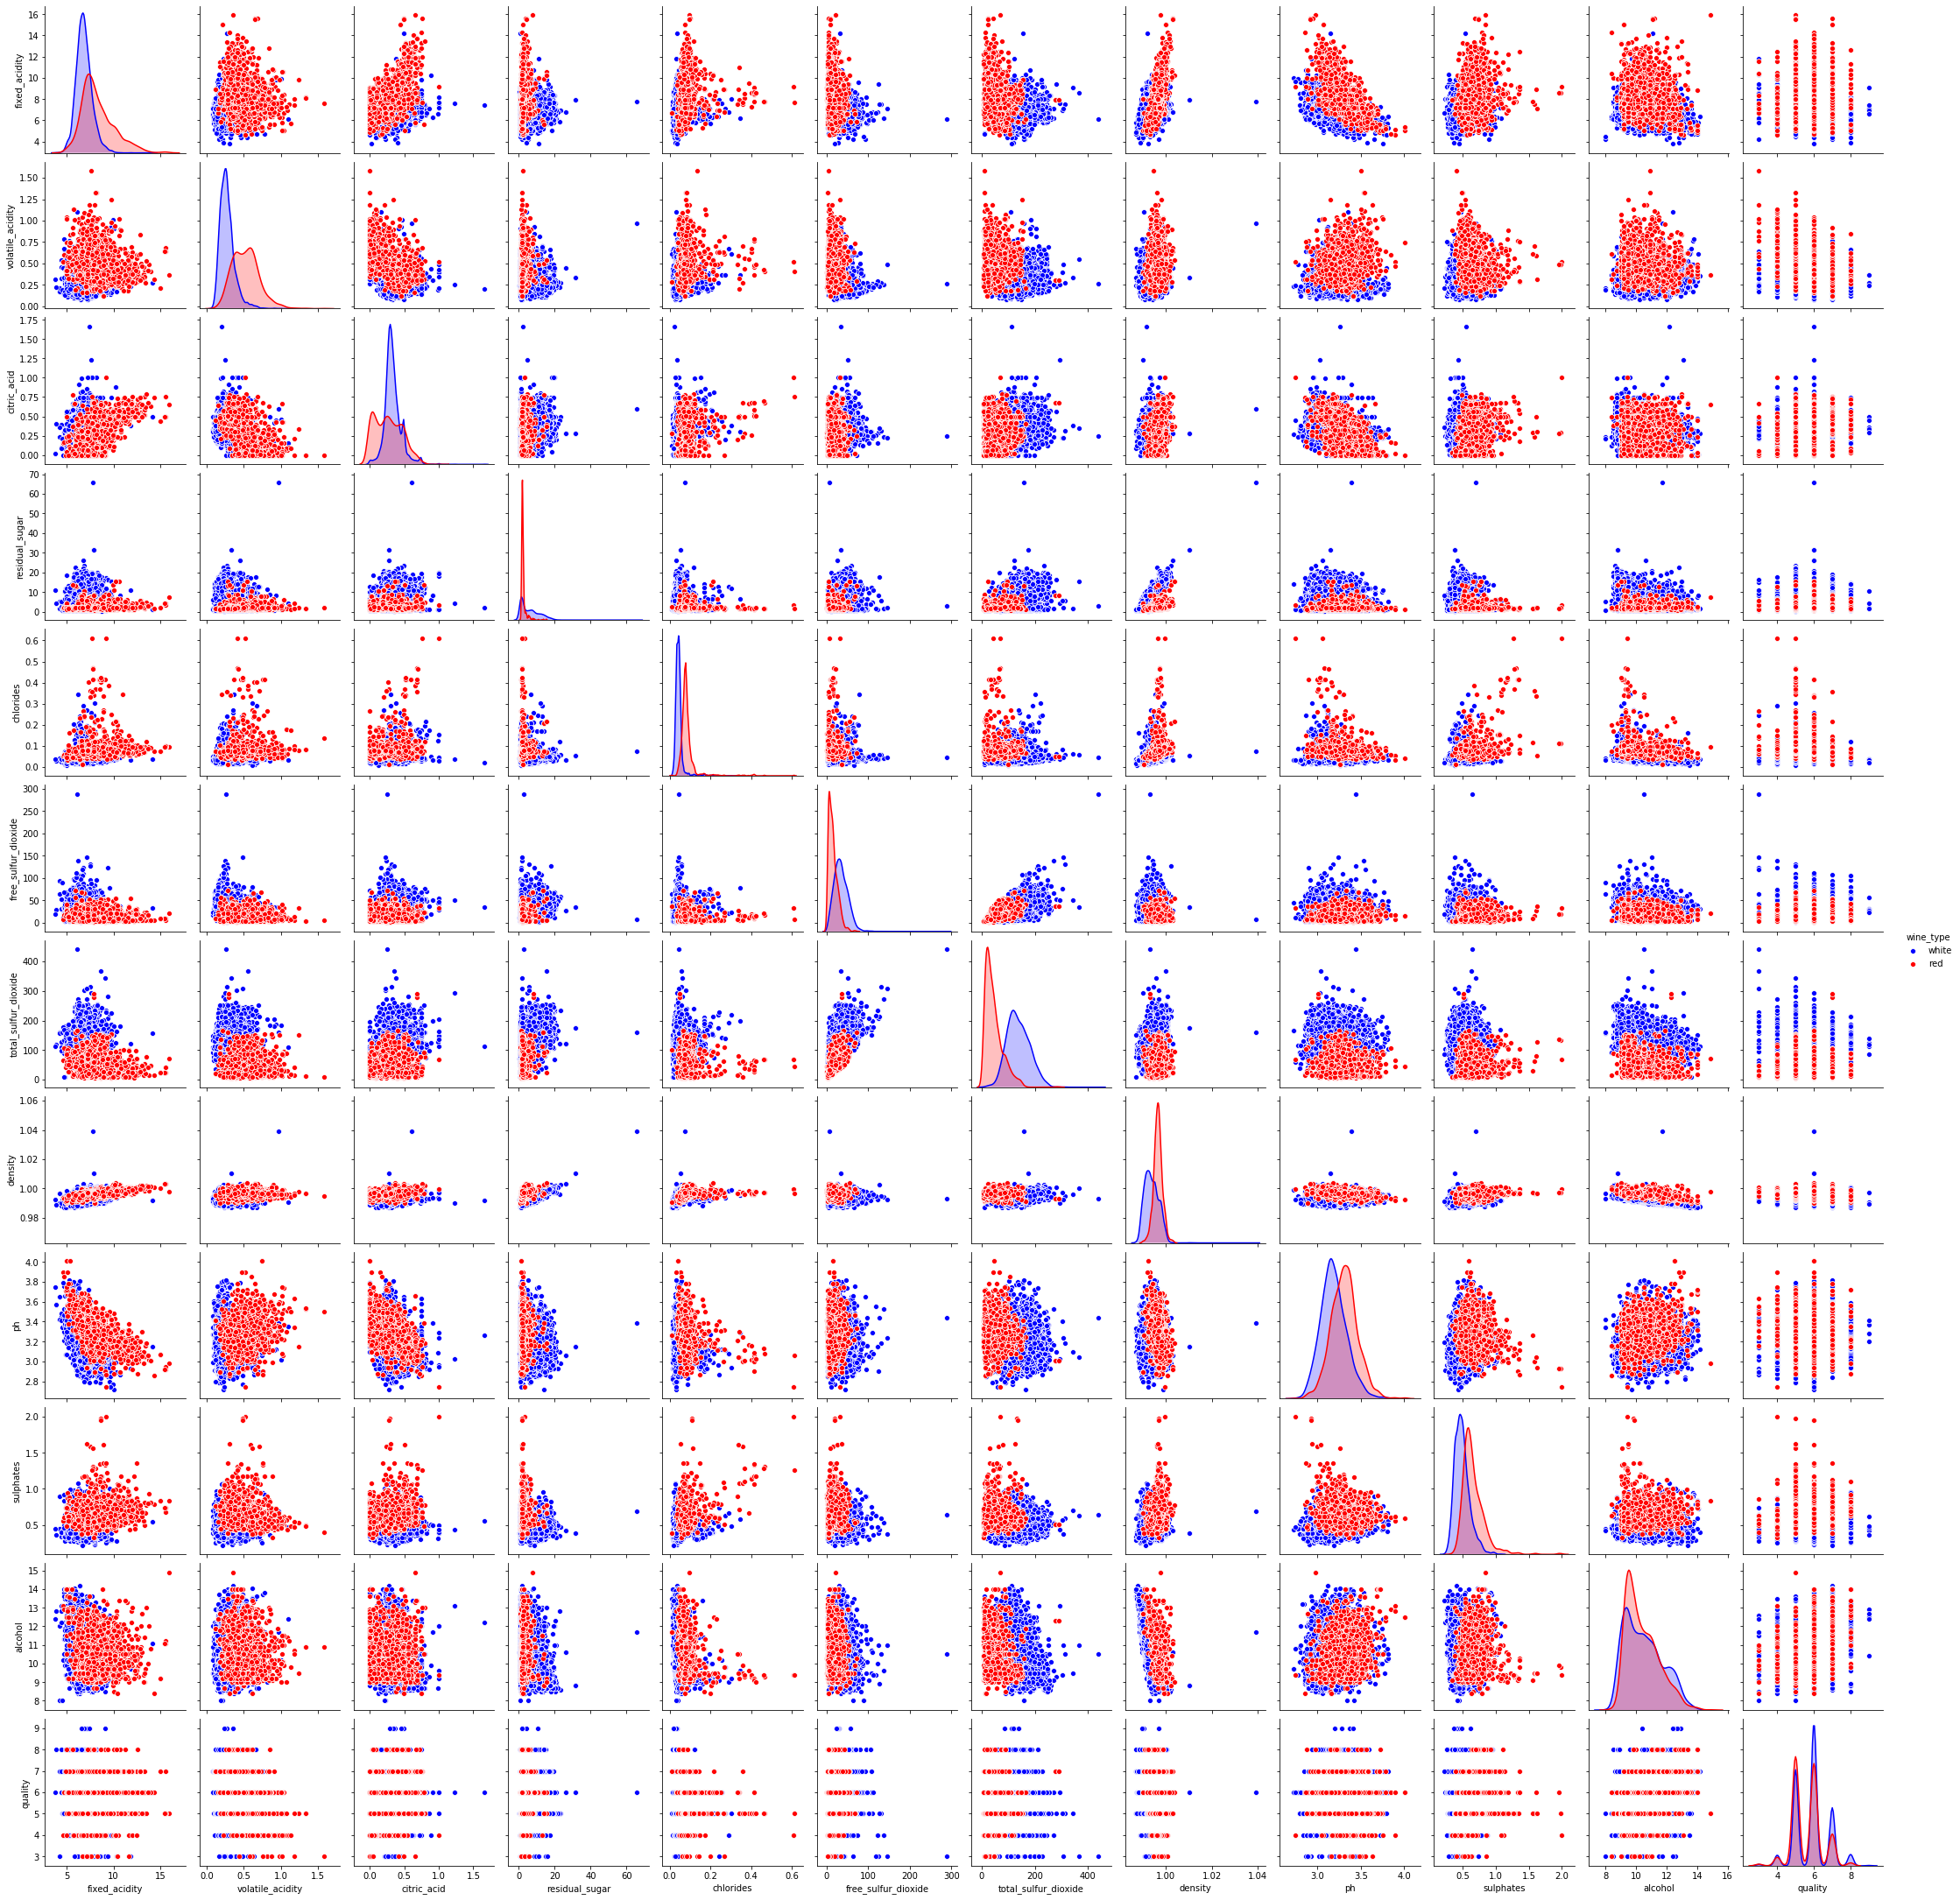

In [17]:
pp = sns.pairplot(all_wines,hue="wine_type",
                  palette={"red" :"red", "white":"blue"})
#fig = pp.fig(figsize=(20,15))


# 5/ Predictive modeling: Wine Type

## - Prepare datasets

In [18]:
from sklearn.model_selection import train_test_split
from collections import Counter
wtp_X_name = numerical_attribute_names.drop('quality')
wtp_X = all_wines[wtp_X_name]
wtp_y = np.array(all_wines["wine_type"])
wtp_train_X, wtp_test_X, wtp_train_y,wtp_test_y = train_test_split(wtp_X,wtp_y,train_size=0.7, random_state=42)
print(Counter(wtp_train_y), Counter(wtp_test_y))

Counter({'white': 3418, 'red': 1129}) Counter({'white': 1480, 'red': 470})


## - Scaling datasets

In [19]:
from sklearn.preprocessing import StandardScaler
wtp_sclaler = StandardScaler()
wtp_train_X_scaled = wtp_sclaler.fit_transform(wtp_train_X)
wtp_test_X_scaled = wtp_sclaler.transform(wtp_test_X)

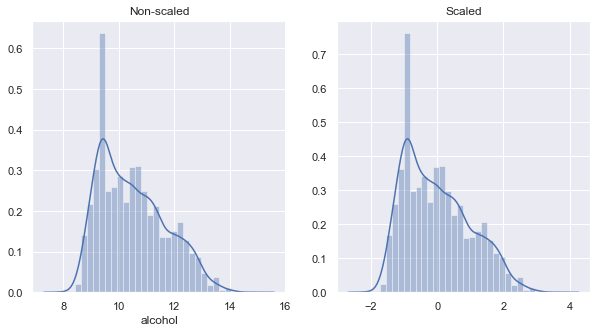

In [20]:
import seaborn as sns
sns.set(color_codes=True)
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))
sns.distplot(wtp_train_X.iloc[:,0],ax=ax1)
ax1.set_title('Non-scaled')
sns.distplot(wtp_train_X_scaled[:,0],ax=ax2)
ax2.set_title('Scaled')
plt.show()

## 5.1/ Using Logistic Regression

### 5.1.1/ Making the model

In [21]:
from sklearn.linear_model import LogisticRegression

# make the model
wtp_lr = LogisticRegression()
wtp_lr.fit(wtp_train_X_scaled,wtp_train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### 5.1.2/ Testing on the testing set

In [22]:
# making prediction
wrp_lr_predictions = wtp_lr.predict(wtp_test_X_scaled)

In [23]:
# confusing matrix
from sklearn.metrics import confusion_matrix,classification_report
labels = ["red","white"]
cm = confusion_matrix(y_true=wtp_test_y,y_pred=wrp_lr_predictions,labels=labels)
report = classification_report(y_true=wtp_test_y,y_pred=wrp_lr_predictions,labels=labels)
print(report)

              precision    recall  f1-score   support

         red       0.99      0.99      0.99       470
       white       1.00      1.00      1.00      1480

    accuracy                           0.99      1950
   macro avg       0.99      0.99      0.99      1950
weighted avg       0.99      0.99      0.99      1950



In [24]:
df = pd.DataFrame(data=cm,
                  columns=["Predicted_" + i for i in labels],
                  index=["Actual_" + i for i in labels])
df["Total"] = df.sum(axis=1)
df.loc["Total"] = df.sum(axis=0)
df

,Predicted_red,Predicted_white,Total
Actual_red,463,7,470
Actual_white,7,1473,1480
Total,470,1480,1950


In [39]:
# predict probabilities
wtp_lr_probs = wtp_lr.predict_proba(wtp_test_X_scaled)

# keep probabilities for the Positive outcome only
wtp_lr_probs = wtp_lr_probs[:,1]

# generate a no skill prediction (majority class)
wtp_ns_probs = [0]*  len(wtp_test_y)



In [41]:
# calculate scores
from sklearn.metrics import roc_auc_score
wtp_ns_auc = roc_auc_score(wtp_test_y, wtp_ns_probs)
wtp_lr_auc = roc_auc_score(wtp_test_y, wtp_lr_probs)
print(f'No skill: ROC AUC = {wtp_ns_auc}')
print(f'Logistic: ROC AUC = {wtp_lr_auc}')

No skill: ROC AUC = 0.5
Logistic: ROC AUC = 0.9953126797009775


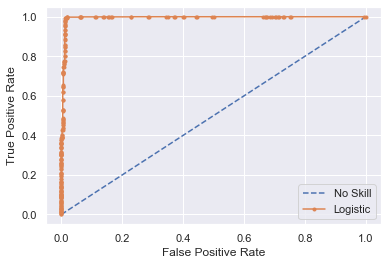

In [45]:
from sklearn.metrics import roc_curve

from sklearn.preprocessing import label_binarize

# covert labels to numbers
labels = wtp_lr.classes_
wtp_test_y_num = label_binarize(wtp_test_y,classes=labels)
wtp_ns_fpr,wtp_ns_tpr,_ = roc_curve(wtp_test_y_num, wtp_ns_probs)
wtp_lr_fpr,wtp_lr_tpr,_ = roc_curve(wtp_test_y_num, wtp_lr_probs)

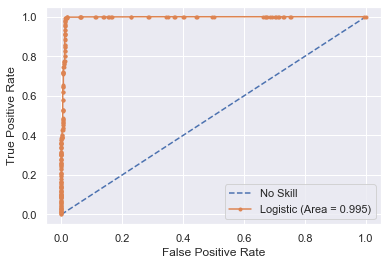

In [48]:
# plot the roc curve for the model
plt.plot(wtp_ns_fpr,wtp_ns_tpr, linestyle='--', label='No Skill')
plt.plot(wtp_lr_fpr,wtp_lr_tpr, marker='.', label=f'Logistic (Area = {wtp_lr_auc:0.3f})')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

[11/11] features ████████████████████ Time elapsed: 0 seconds

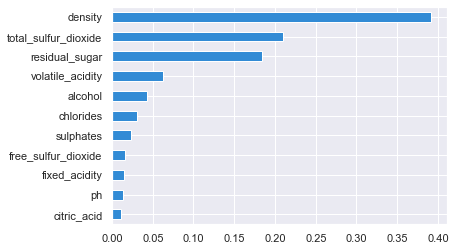

In [53]:
from skater.core.explanations import Interpretation
from skater.model import InMemoryModel
model = InMemoryModel(wtp_lr.predict_proba, examples = wtp_train_X_scaled)
interpreter = Interpretation(wtp_train_X_scaled, feature_names=wtp_X_name)
plot = interpreter.feature_importance.plot_feature_importance(model, ascending=False)

In [72]:
a= interpreter.feature_importance.feature_importance(model,ascending=False).reindex()
b = pd.DataFrame(a).reset_index()
b.rename(columns={"index":"feature",0:"contribution"},inplace=True)
b["cumsum"] = b["contribution"].cumsum()
b

[11/11] features ████████████████████ Time elapsed: 0 seconds

density                 0.391143
total_sulfur_dioxide    0.209429
residual_sugar          0.184121
volatile_acidity        0.062758
alcohol                 0.043449
chlorides               0.031295
sulphates               0.022298
free_sulfur_dioxide     0.015857
fixed_acidity           0.014619
ph                      0.013919
citric_acid             0.011112
dtype: float64

In [85]:
from sklearn.preprocessing import LabelEncoder
# label-encoding for y_sets
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
wtp_train_y_encoded = le.fit_transform(wtp_train_y)
n_class = le.classes_
n_color = plt.cm.RdYlBu(np.linspace(0, 1, len(n_class)))
n_color

array([[0.64705882, 0.        , 0.14901961, 1.        ],
       [0.19215686, 0.21176471, 0.58431373, 1.        ]])

In [90]:
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(wtp_train_y_encoded == i)
    plt.scatter(wtp_train_X_scaled[idx, 0], wtp_train_X_scaled[idx, 1], c=n_color,
                label=label_names[i], cmap=cmap, edgecolors='black',
                marker=markers[i], alpha=alphas[i])
plt.legend()
plt.show()
idx = np.where(wtp_train_y_encoded == 1)
idx

(array([   0,    2,    5, ..., 4543, 4544, 4546], dtype=int64),)

In [91]:
wtp_train_X_scaled

array([[-2.11449267e-03, -4.28481943e-01,  6.90600374e-03, ...,
         2.49610131e-01, -6.97890732e-01, -9.18356151e-01],
       [-6.71732472e-01,  7.66270242e-01,  1.17501800e+00, ...,
         2.49610131e-01, -7.15540672e-01,  6.75108259e-01],
       [-1.17394596e+00,  7.38485307e-01, -4.74081290e-01, ...,
        -2.12326078e-01,  7.31754395e-01, -6.11920687e-01],
       ...,
       [ 1.58822821e+00, -5.39621681e-01,  7.56184742e-02, ...,
        -1.07020761e+00,  6.96454515e-01, -2.44198131e-01],
       [ 1.08601472e+00,  4.32851027e-01, -1.36734341e+00, ...,
         2.36131851e+00, -1.22738893e+00,  1.71698884e+00],
       [ 5.83801239e-01, -8.73040895e-01,  7.56184742e-02, ...,
        -1.33417116e+00, -1.06853947e+00,  1.23524425e-01]])

## 5.2/ Using Deep Neural Network (DNN)

### 5.2.1/ Making the model

In [25]:
# label-encoding for y_sets
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
wtp_train_y_encoded = le.fit_transform(wtp_train_y)
wtp_test_y_encoded = le.transform(wtp_test_y)

# build model
from keras.models import Sequential
from keras.layers import Dense

wtp_dnn = Sequential([Dense(8,activation='relu',input_shape=wtp_X_name.shape),
                      Dense(8,activation='relu'),
                      Dense(1,activation='sigmoid')])
wtp_dnn.compile(loss = 'binary_crossentropy', optimizer='adam',metrics=["accuracy"])

Using TensorFlow backend.
C:\Users\zacha\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\zacha\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\zacha\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\zacha\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


### 5.2.2/ Training

In [26]:
history = wtp_dnn.fit(wtp_train_X_scaled,wtp_train_y_encoded,
                      epochs=30,batch_size=5,shuffle=True,validation_split=0.1,verbose=1)


Train on 4092 samples, validate on 455 samples
Epoch 1/30
4092/4092 [==============================] - 1s 175us/step - loss: 0.1803 - accuracy: 0.9550 - val_loss: 0.0207 - val_accuracy: 0.9978

### 5.2.3/ Testing on the testing set

In [27]:
# making prediction
wtp_dnn_predictions = wtp_dnn.predict_classes(wtp_test_X_scaled)
wtp_dnn_predictions  = le.inverse_transform(wtp_dnn_predictions )   # inverse_transform back to ["red" or "white"]

C:\Users\zacha\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:289: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
# confusing matrix
from sklearn.metrics import confusion_matrix,classification_report
labels = ["red","white"]
cm = confusion_matrix(y_true=wtp_test_y,y_pred=wtp_dnn_predictions ,labels=labels)
report = classification_report(y_true=wtp_test_y,y_pred=wtp_dnn_predictions ,labels=labels)
print(report)


              precision    recall  f1-score   support

         red       0.99      0.99      0.99       470
       white       1.00      1.00      1.00      1480

    accuracy                           0.99      1950
   macro avg       0.99      0.99      0.99      1950
weighted avg       0.99      0.99      0.99      1950



In [29]:
df = pd.DataFrame(data=cm,
                  columns=["Predicted_" + i for i in labels],
                  index=["Actual_" + i for i in labels])
df["Total"] = df.sum(axis=1)
df.loc["Total"] = df.sum(axis=0)
df

,Predicted_red,Predicted_white,Total
Actual_red,463,7,470
Actual_white,5,1475,1480
Total,468,1482,1950


### - Plot Train/Validation Accuracy and Loss

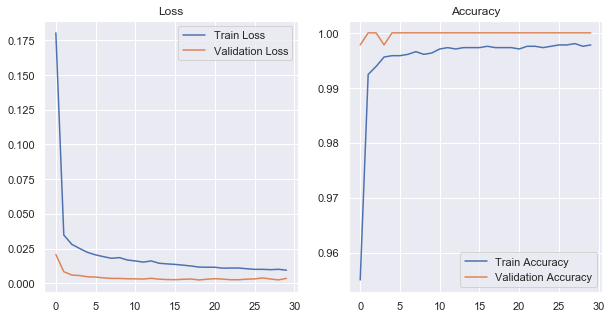

In [30]:
history_log = history.history
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))
epochs = list(range(len(history_log['loss'])))
ax1.plot(epochs,history_log["loss"],label="Train Loss")
ax1.plot(epochs,history_log["val_loss"],label="Validation Loss")
ax1.set_title('Loss')
ax1.legend(loc="best")

ax2.plot(epochs,history_log["accuracy"],label="Train Accuracy")
ax2.plot(epochs,history_log["val_accuracy"],label="Validation Accuracy")
ax2.set_title('Accuracy')
ax2.legend(loc="best")
plt.show()